# Egg AI project

## Author: Dravyn, Jasmin, Jeff, Oleks

#### Original Dataset: Md Anowar Hossen Faysal, Md Rasel Ahmed, Md Masudur Rahaman

#### Dataset: https://www.kaggle.com/datasets/faysal1998/environmental-effect-on-egg-production
1. Amount_of_chicken: The number of chickens in the farm or enclosure.

2. Amount_of_Feeding: The quantity of food fed to the chickens, likely in kilograms or pounds.

3. Ammonia: Ammonia level in the chicken coop or enclosure. Ammonia is a gas that is produced by the decomposition of chicken waste and can be harmful to chickens in high concentrations.

4. Temperature: The temperature inside the chicken coop or enclosure, measured in degrees Celsius (C).

5. Humidity: The humidity inside the chicken coop or enclosure, measured in percentage.

6. Light_Intensity: The intensity of light in the chicken coop or enclosure.

7. Noise: The noise level in the chicken coop or enclosure, measured in decibels (dB).

8. Total_egg_production: The total number of eggs produced by the chickens.


**Missing Values** <br>
None

# Look at the Big Picture

## Frame the Problem
1. Supervised Learning
2. A regression task
3. Batch Learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

In [86]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Download the dataset

url = "https://raw.githubusercontent.com/ItsJJH/egg-ai-project/develop/Egg_Production.csv"
eggs = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
egg_backup = eggs

In [88]:
eggs

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
0,2728,170,14.4,29.3,51.7,364,214,2115
1,2728,175,17.6,29.3,52.3,369,235,1958
2,2728,175,15.0,29.3,52.5,373,237,1990
3,2728,170,15.0,29.3,49.7,372,240,2015
4,2728,170,15.9,29.2,51.4,381,237,2112
...,...,...,...,...,...,...,...,...
476,2735,180,14.4,29.0,49.5,341,224,2065
477,2735,185,14.9,29.5,50.7,317,202,2202
478,2735,180,16.0,29.5,49.3,346,197,1972
479,2732,195,13.4,30.0,51.7,325,183,2120


In [89]:
eggs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     481 non-null    int64  
 1   Amount_of_Feeding     481 non-null    int64  
 2   Ammonia               481 non-null    float64
 3   Temperature           481 non-null    float64
 4   Humidity              481 non-null    float64
 5   Light_Intensity       481 non-null    int64  
 6   Noise                 481 non-null    int64  
 7   Total_egg_production  481 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 30.2 KB


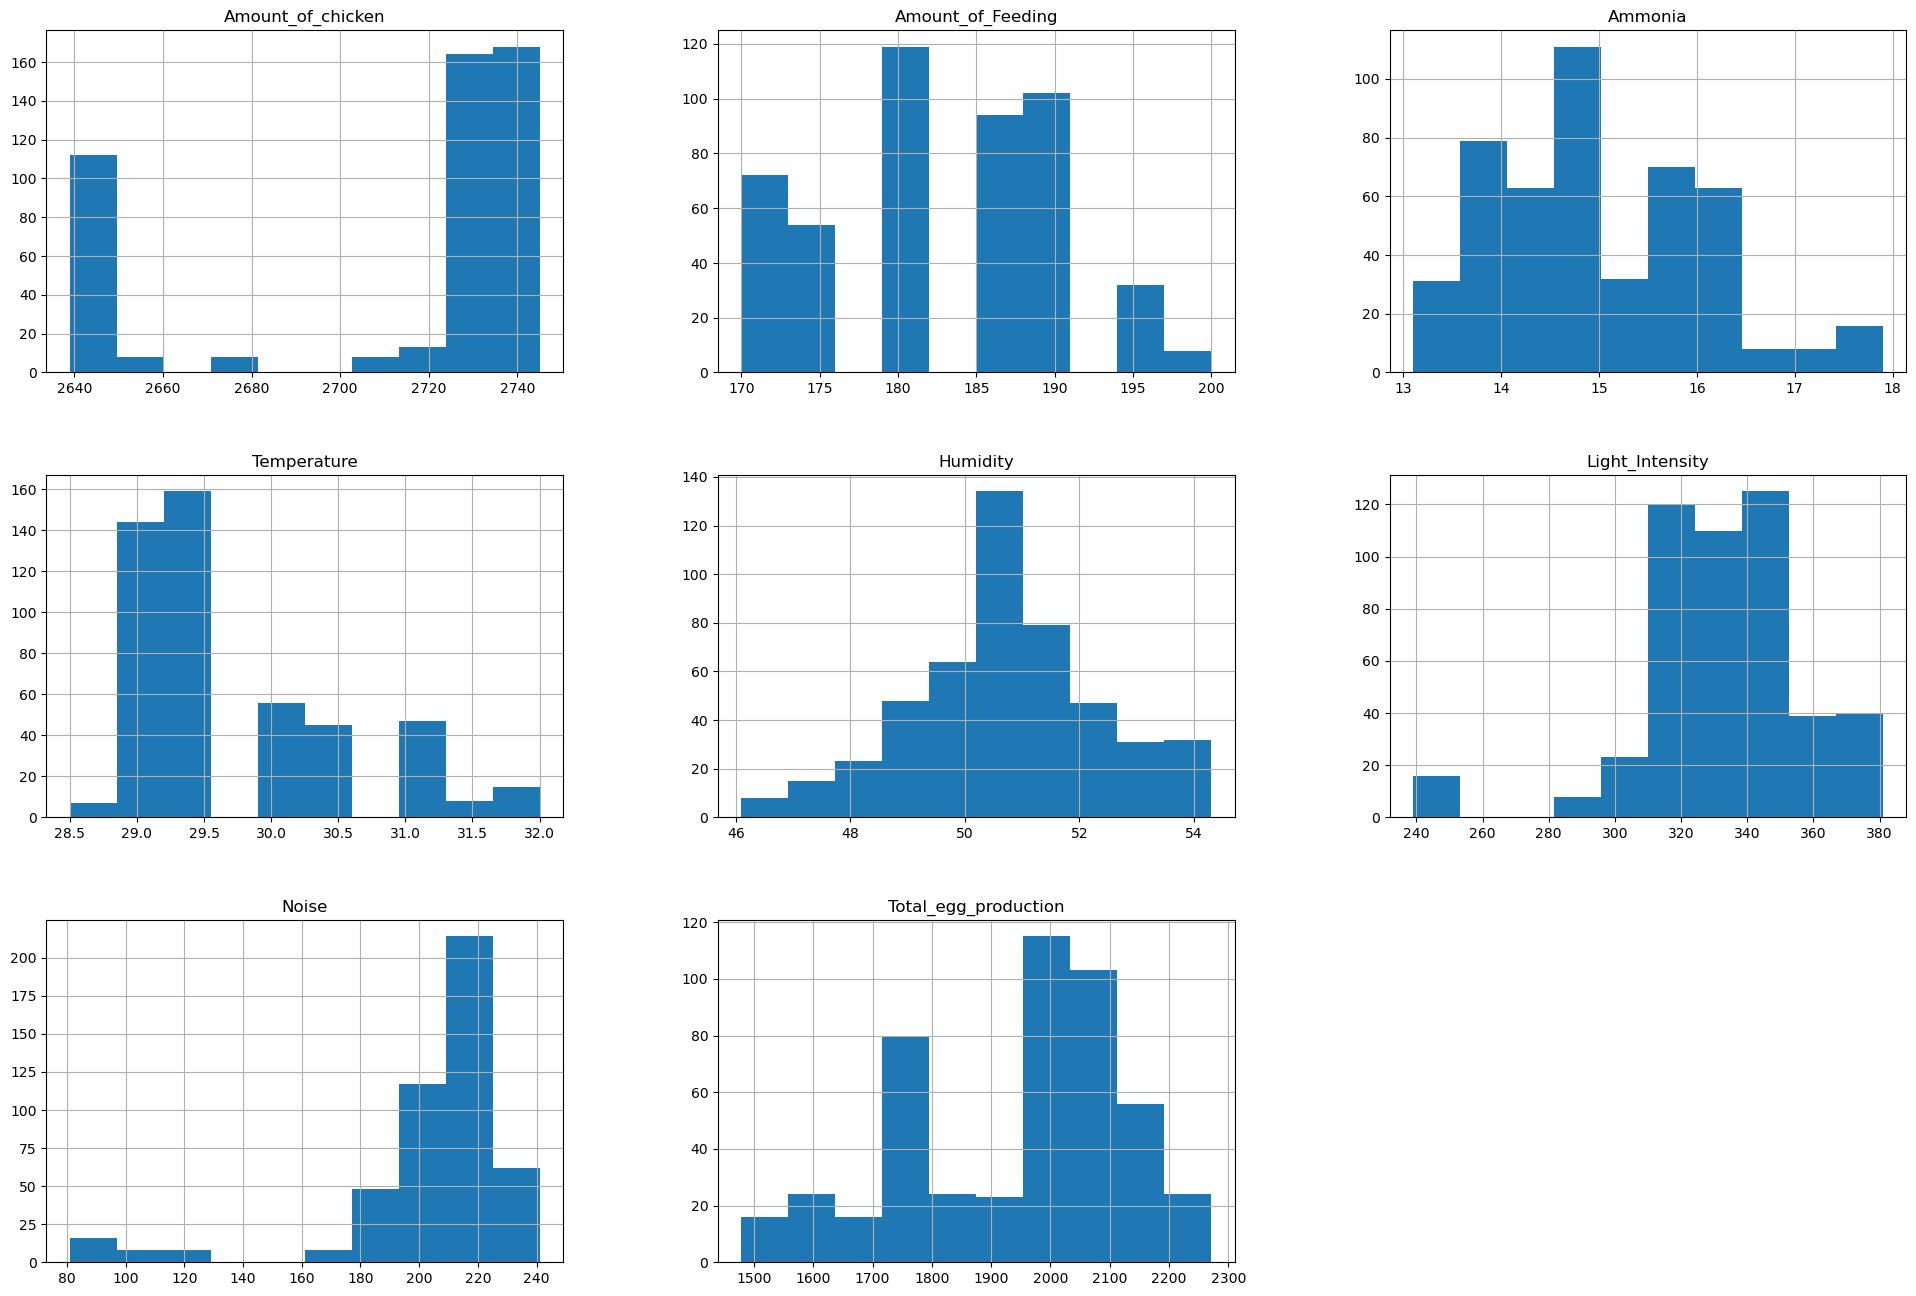

In [90]:
eggs.hist(figsize=(24, 16))
plt.show()

c:\Users\88jad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\88jad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\88jad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\88jad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

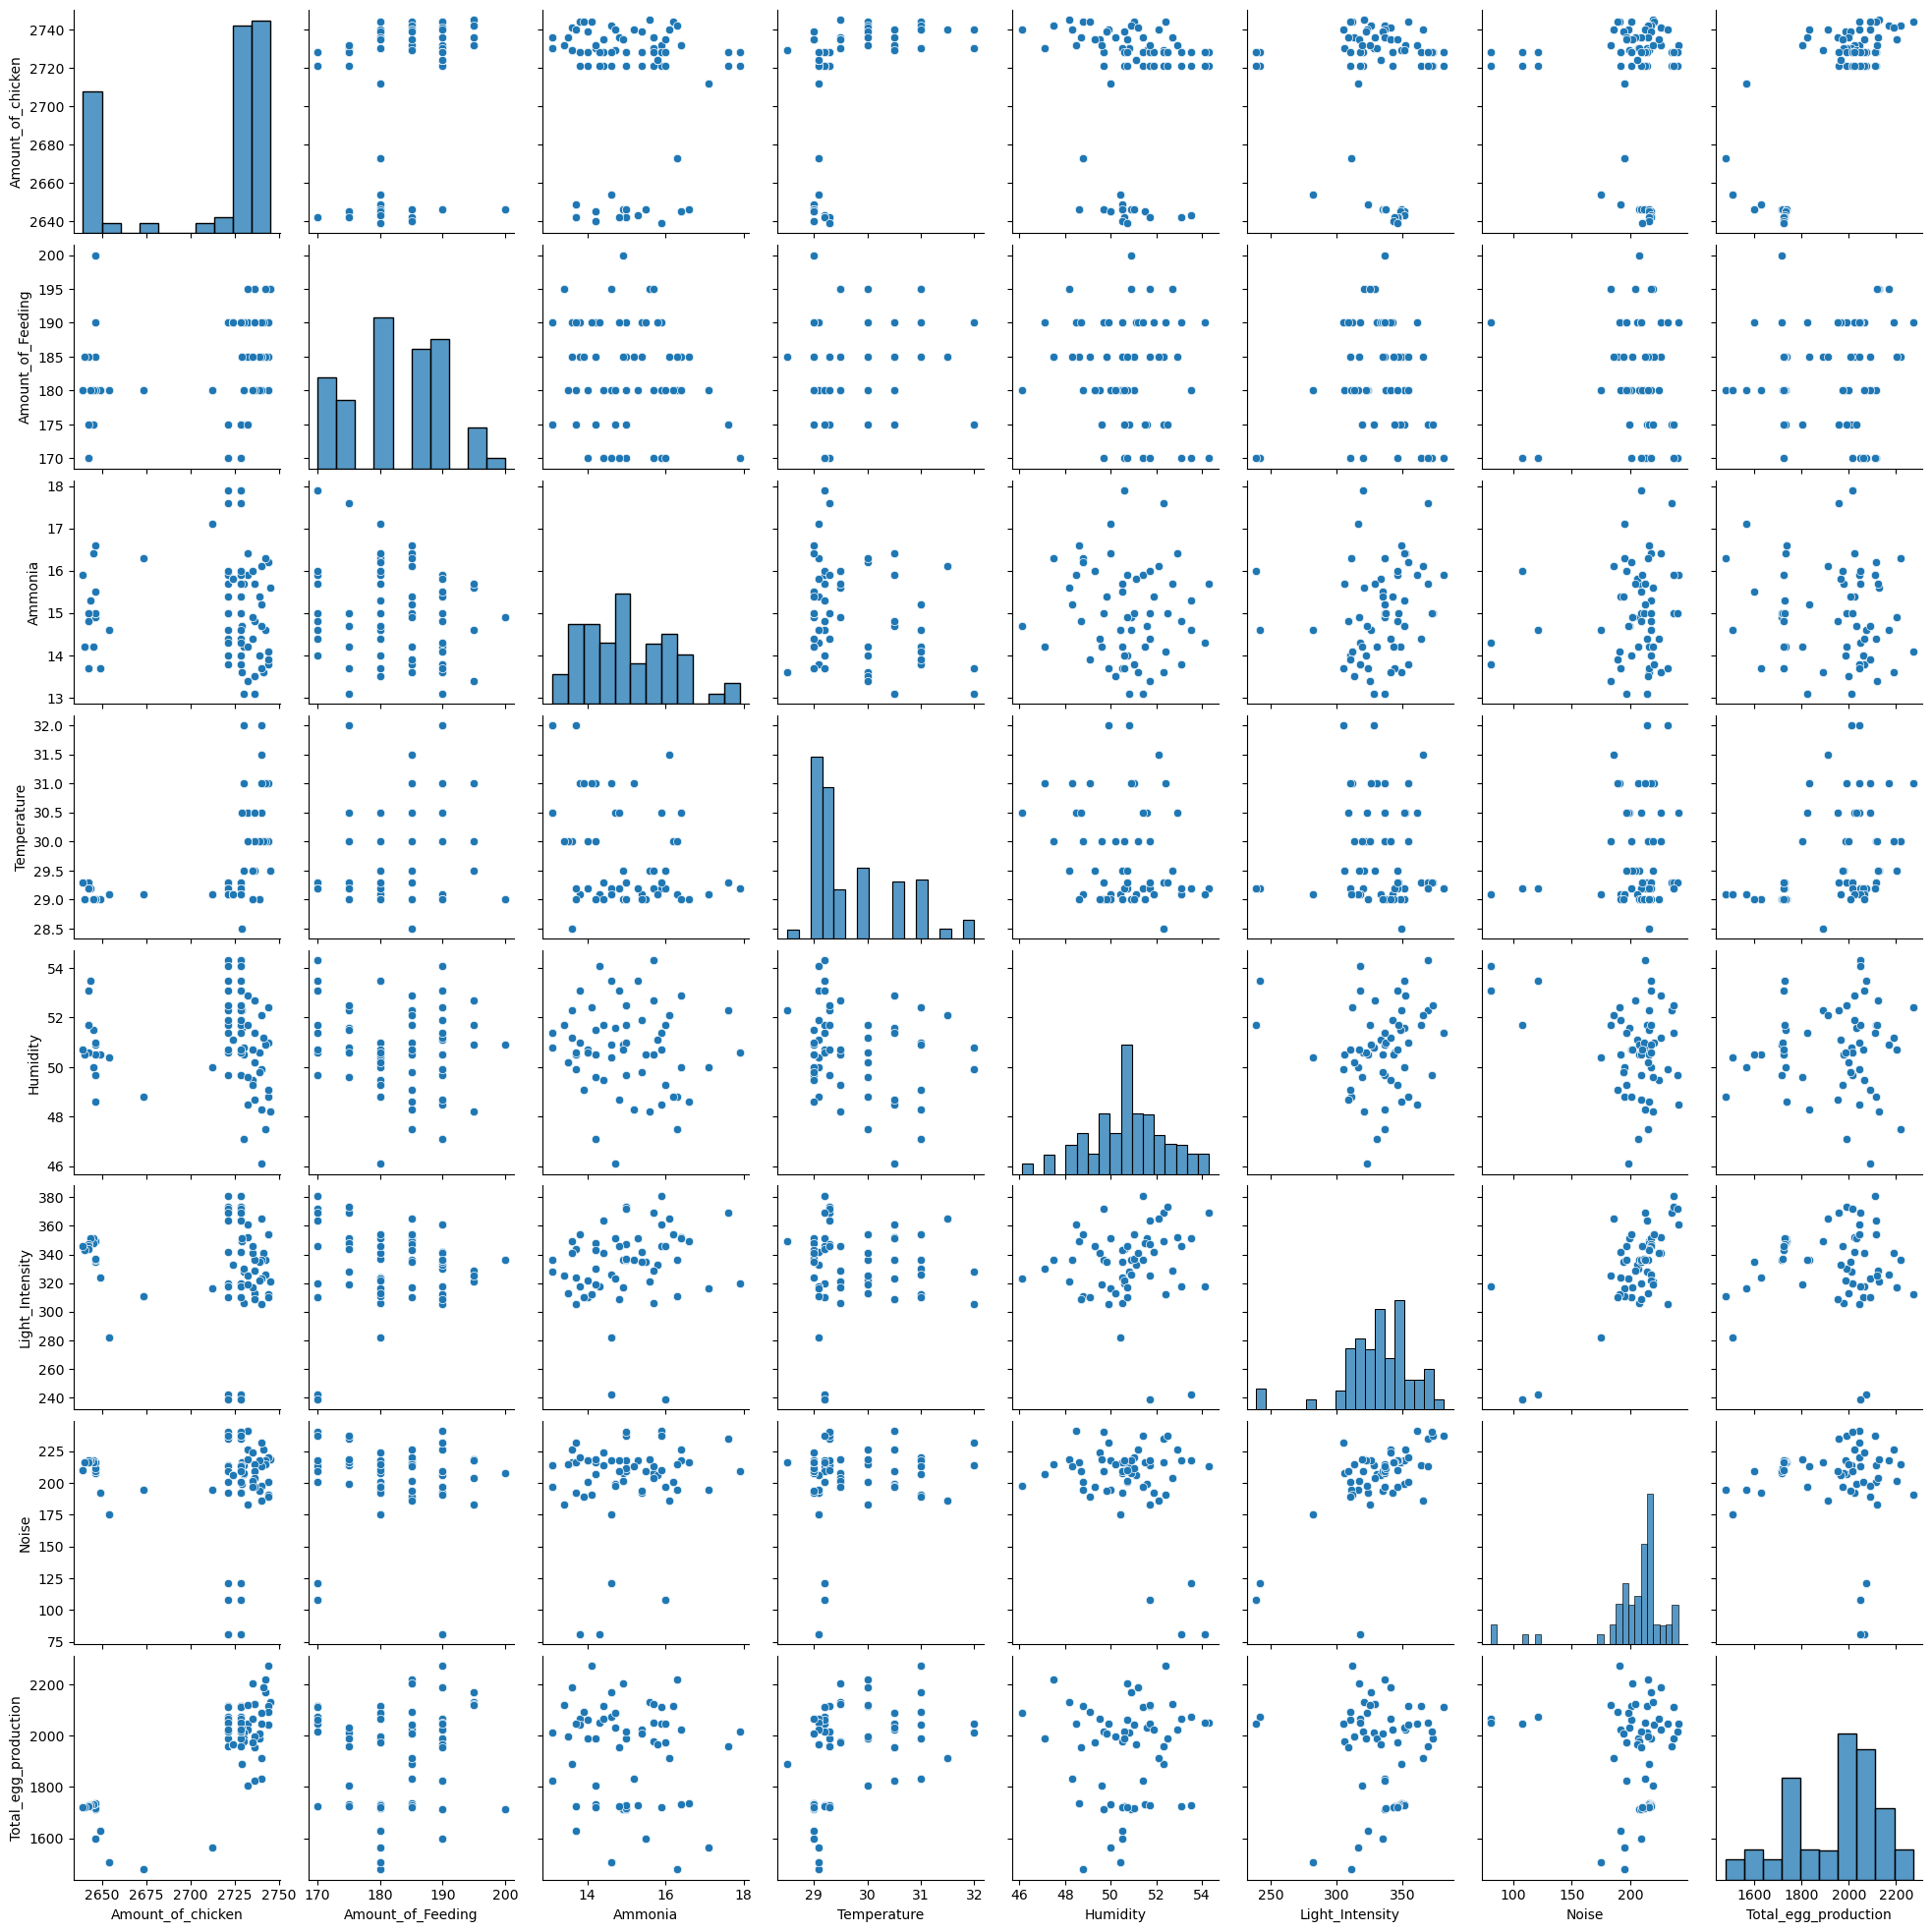

In [91]:
sns.pairplot(eggs)

# Pipeline

In [92]:
# Import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [93]:
# Store columns into list
num_cols = eggs.select_dtypes(include='number').columns.to_list()

# Select Standard Scaler
SCALER = StandardScaler()

# Make pipeline
num_pipeline = make_pipeline(SCALER)

# Create preprocessing
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)], remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Amount_of_chicken', 'Amount_of_Feeding',
                                  'Ammonia', 'Temperature', 'Humidity',
                                  'Light_Intensity', 'Noise',
                                  'Total_egg_production'])])

In [94]:
# Fit and transform dataframe
eggs_scaled = preprocessing.fit_transform(eggs)

# Prepare new data set
feature_names = preprocessing.get_feature_names_out()
eggs_prepared = pd.DataFrame(data=eggs_scaled, columns=feature_names)

eggs_prepared

,num__Amount_of_chicken,num__Amount_of_Feeding,num__Ammonia,num__Temperature,num__Humidity,num__Light_Intensity,num__Noise,num__Total_egg_production
0,0.454869,-1.598683,-0.545859,-0.481392,0.583813,1.199681,0.346252,0.946460
1,0.454869,-0.952493,2.400094,-0.481392,0.942758,1.391658,1.010038,0.115398
2,0.454869,-0.952493,0.006507,-0.481392,1.062406,1.545240,1.073256,0.284787
3,0.454869,-1.598683,0.006507,-0.481392,-0.612668,1.506845,1.168083,0.417121
4,0.454869,-1.598683,0.835057,-0.604165,0.404341,1.852404,1.073256,0.930580
...,...,...,...,...,...,...,...,...
476,0.634061,-0.306302,-0.545859,-0.849711,-0.732317,0.316583,0.662341,0.681791
477,0.634061,0.339888,-0.085554,-0.235846,-0.014427,-0.604909,-0.033055,1.406985
478,0.634061,-0.306302,0.927118,-0.235846,-0.851965,0.508561,-0.191099,0.189506
479,0.557264,1.632269,-1.466469,0.378018,0.583813,-0.297745,-0.633623,0.972927


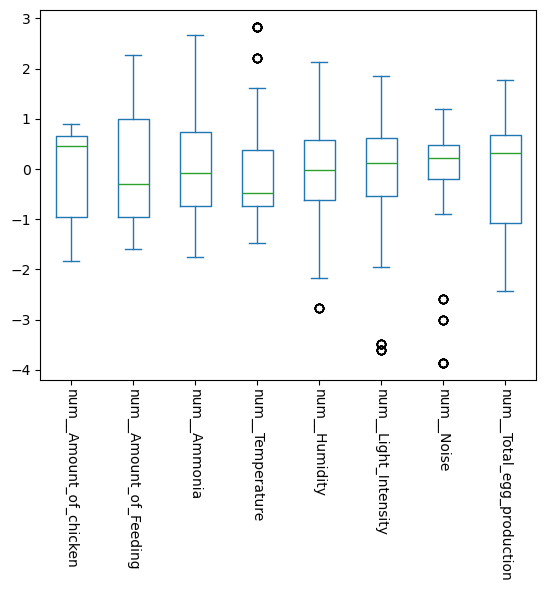

In [95]:
eggs_prepared.plot.box()
plt.xticks(rotation = -90)
plt.show()

In [96]:
eggs_prepared

,num__Amount_of_chicken,num__Amount_of_Feeding,num__Ammonia,num__Temperature,num__Humidity,num__Light_Intensity,num__Noise,num__Total_egg_production
0,0.454869,-1.598683,-0.545859,-0.481392,0.583813,1.199681,0.346252,0.946460
1,0.454869,-0.952493,2.400094,-0.481392,0.942758,1.391658,1.010038,0.115398
2,0.454869,-0.952493,0.006507,-0.481392,1.062406,1.545240,1.073256,0.284787
3,0.454869,-1.598683,0.006507,-0.481392,-0.612668,1.506845,1.168083,0.417121
4,0.454869,-1.598683,0.835057,-0.604165,0.404341,1.852404,1.073256,0.930580
...,...,...,...,...,...,...,...,...
476,0.634061,-0.306302,-0.545859,-0.849711,-0.732317,0.316583,0.662341,0.681791
477,0.634061,0.339888,-0.085554,-0.235846,-0.014427,-0.604909,-0.033055,1.406985
478,0.634061,-0.306302,0.927118,-0.235846,-0.851965,0.508561,-0.191099,0.189506
479,0.557264,1.632269,-1.466469,0.378018,0.583813,-0.297745,-0.633623,0.972927


In [97]:
# Verifying that df has been scaled properly
print(eggs_prepared.min(), '\n')
print(eggs_prepared.max())

num__Amount_of_chicken      -1.823416
num__Amount_of_Feeding      -1.598683
num__Ammonia                -1.742652
num__Temperature            -1.463575
num__Humidity               -2.766336
num__Light_Intensity        -3.599760
num__Noise                  -3.857729
num__Total_egg_production   -2.420136
dtype: float64 

num__Amount_of_chicken       0.890048
num__Amount_of_Feeding       2.278459
num__Ammonia                 2.676277
num__Temperature             2.833475
num__Humidity                2.139240
num__Light_Intensity         1.852404
num__Noise                   1.199692
num__Total_egg_production    1.772229
dtype: float64


### Splitting Dataset into Train/Validation/Test Sets

In [98]:
VALIDATION_SIZE =  0.4
TEST_SIZE = 0
TRAIN_SIZE = 1 - VALIDATION_SIZE - TEST_SIZE
SEED = 1234567890

#### Option 1: Through Numpy and Pandas

In [99]:
# Personally don't really like this one
num_rows = len(eggs_prepared.index)

test_set, val_set, train_set = np.split(eggs_prepared, [int(TEST_SIZE*num_rows), int(VALIDATION_SIZE*num_rows)])

c:\Users\88jad\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


#### Option 2: Through Sklearn Standard

In [100]:
from sklearn.model_selection import train_test_split

X = eggs_prepared.drop(["num__Total_egg_production"], axis=1) # it's not a feature but a target
y = eggs_prepared["num__Total_egg_production"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=VALIDATION_SIZE, 
                                      train_size=TRAIN_SIZE, 
                                      random_state=SEED, 
                                      shuffle=True)

# The targets(Total_egg_production) of the train and validation sets
# train_target = np.ravel(train_set[['num__Total_egg_production']].copy()) # np.ravel flattens the array
# val_target = val_set[['num__Total_egg_production']].copy()

# Dropping the Total_egg_production off both train and vali dation sets
# train_set.drop(labels='num__Total_egg_production', axis=1, inplace=True)
# val_set.drop(labels='num__Total_egg_production', axis=1, inplace=True)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(288, 7) (288,) (193, 7) (193,)


#### Option 3: Through Sklearn with k-folds

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [101]:
from sklearn.model_selection import KFold

NUM_SPLITS = 5

k_folds = KFold(n_splits=NUM_SPLITS, shuffle=False)
fold = k_folds.split(eggs_prepared)

### Linear Regression using standard split

Pretty much pulled straight from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html if you wanna follow, also DELETE BEFORE SUBMITING

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

lin_pred = lin_reg_model.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

print('Correlation Coefficients: ')
for i in range(len(lin_reg_model.coef_.flatten())):
    print(f'{feature_names[i]:<18}:\t{lin_reg_model.coef_.flatten()[i]:.5f}')


print(f'Mean Squared Error: \t\t{mean_squared_error(y_test, lin_pred):.5f}') # Lower better
print(f'Coefficient of Determination:   {r2_score(y_test, lin_pred):.5f}')   # Higher better


Correlation Coefficients: 
num__Amount_of_chicken:	0.84430
num__Amount_of_Feeding:	0.04148
num__Ammonia      :	-0.05860
num__Temperature  :	-0.05837
num__Humidity     :	0.07222
num__Light_Intensity:	0.06361
num__Noise        :	0.00839
Mean Squared Error: 		0.31726
Coefficient of Determination:   0.69935


Scatterplot looks ugly because of the amount_of_chicken being so heavily weighted to either end, so maybe remove

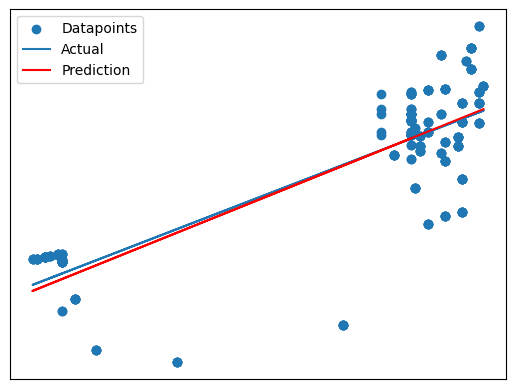

In [105]:
plt.scatter(X_train['num__Amount_of_chicken'], y_train)

# Line of best fit for actual
a, b = np.polyfit(X_train['num__Amount_of_chicken'], y_train, 1)
plt.plot(X_train['num__Amount_of_chicken'], a*X_train['num__Amount_of_chicken']+b)

# Line of best fit for predictions
a, b = np.polyfit(X_test['num__Amount_of_chicken'], y_test, 1)
plt.plot(X_test['num__Amount_of_chicken'], a*X_test['num__Amount_of_chicken']+b, color='red')

# Graph settings
plt.xticks(())
plt.yticks(())
plt.legend(['Datapoints','Actual', 'Prediction'])

plt.show()


### Gradient Descent Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#:~:text=Gradient%20Boosting%20for%20regression.,of%20the%20given%20loss%20function.

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

grad_descent_model = GradientBoostingRegressor()

grad_descent_model.fit(X_train, y_train)

grad_pred = grad_descent_model.predict(X_test)


print(f'Mean Squared Error: \t\t{mean_squared_error(y_test, grad_pred):.5f}') # Lower better
print(f'Coefficient of Determination:   {r2_score(y_test, grad_pred):.5f}')   # Higher better


Mean Squared Error: 		0.00566
Coefficient of Determination:   0.99463


In [109]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(grad_descent_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# mean_score = -scores.mean()  # Take the negative value to get the mean squared error

# print(f'Cross-Validation Mean Score: {mean_score:.7f}')
# scores

Cross-Validation Mean Score: 0.0077594


### Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [110]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_model = RandomForestRegressor()

rand_forest_model.fit(X_train, y_train)

rand_forest_pred = rand_forest_model.predict(X_test)


print(f'Mean Squared Error: \t\t{mean_squared_error(y_test, rand_forest_pred):.5f}') # Lower better
print(f'Coefficient of Determination:   {r2_score(y_test, rand_forest_pred):.5f}')   # Higher better



Mean Squared Error: 		0.00049
Coefficient of Determination:   0.99954


DON'T FORGET TO CITE HER FOR THE CODE BELOW(5.5)

In [ ]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso

# RidgeRegression = Ridge(alpha=0.5)
# ridge_model = RidgeRegression.fit(val_set, val_target)


# LassoRegression = Lasso(alpha=0.5)
# lasso_model = LassoRegression.fit(val_set, val_target)

In [ ]:
# Ridge_y_predict = ridge_model.predict(val_set)
# Lasso_y_predict = lasso_model.predict(val_set)
# ridge_mse = mean_squared_error(val_target, Ridge_y_predict)
# lasso_mse = mean_squared_error(val_target, Lasso_y_predict)

# print(f'Ridge Regression MSE: {ridge_mse:.5f}')
# print(f'Lasso Regression MSE: {lasso_mse:.5f}')

Ridge Regression MSE: 0.35666
Lasso Regression MSE: 0.69804


In [ ]:
# Purely out of curiosity, printing the differences between predictions and actual egg production
# temp = val_target.values.tolist()

# for i in range(len(rand_forest_pred)):
#     print(temp[i][0]-rand_forest_pred[i])

-0.0007940086065132412
1.7763568394002505e-15
-5.551115123125783e-17
-5.551115123125783e-17
4.163336342344337e-17
1.5543122344752192e-15
-0.012757071611332549
9.992007221626409e-16
-1.1102230246251565e-16
1.7763568394002505e-15
-7.216449660063518e-16
0.030013525326244572
7.771561172376096e-16
-0.004552316010682747
-1.1102230246251565e-16
1.7763568394002505e-15
-1.3322676295501878e-15
-3.1086244689504383e-15
-0.0016938850272309042
-8.881784197001252e-16
0.030013525326244572
3.885780586188048e-16
-0.00449938210358114
-3.1086244689504383e-15
1.1102230246251565e-16
-0.004605249917786214
-5.551115123125783e-16
1.5543122344752192e-15
1.2212453270876722e-15
-8.881784197001252e-16
-1.1102230246251565e-16
-0.0026466953550477734
-3.885780586188048e-16
-0.001217479863323323
-0.00449938210358114
-3.1086244689504383e-15
-0.0016938850272309042
1.6653345369377348e-16
-0.004605249917786214
1.7763568394002505e-15
1.5543122344752192e-15
1.1102230246251565e-15
-1.1102230246251565e-15
-3.1086244689504383e

Validation

IDK WHAT THIS MEANS, but we vibin'

In [ ]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(lin_reg_model, train_set, train_target, cv=5, scoring='neg_mean_squared_error')

# mean_score = -scores.mean()  # Take the negative value to get the mean squared error

# print(f'Cross-Validation Mean Score: {mean_score}')
# scores

Cross-Validation Mean Score: 0.3000008208173307


array([-0.24826287, -0.25640146, -0.35397782, -0.26237908, -0.37898288])